In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=18)
sns.set(font=myfont.get_name())
#sns.set(font = 'SimHei', font_scale=0.8)
sns.set(style = 'white')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = 'Arial'

In [2]:
#from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
f = open("Original_database_main.csv", encoding = 'utf-8')
df = pd.read_csv(f)
df.shape

(786, 72)

In [9]:
new_df = df[df['classify'] == 'epoxy']
new_df.shape

(228, 72)

In [8]:
df_v = new_df.dropna(axis = 'index',how = 'all',subset = ['Frontal Velocity(cm/min)']) #包含所有前端速度的数据#
df_v.shape

(195, 72)

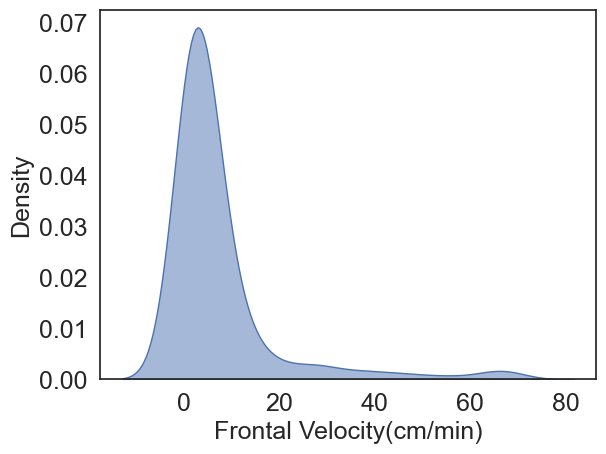

In [10]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_v, x="Frontal Velocity(cm/min)", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("速度密度图0416",dpi=600,bbox_inches='tight')
plt.show()

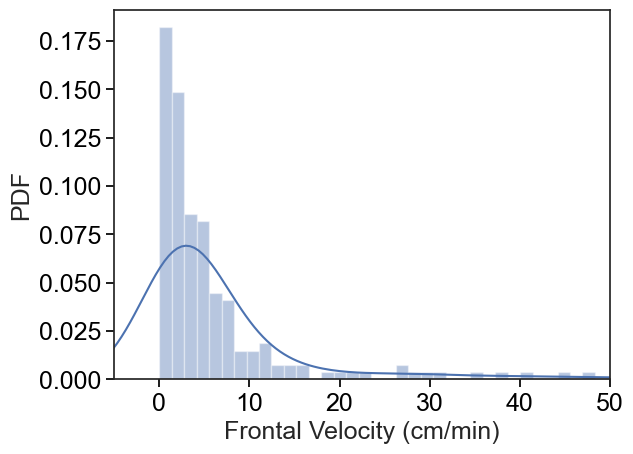

In [18]:
sns.distplot(df_v['Frontal Velocity(cm/min)'].values, bins = 50, axlabel = 'Frontal Velocity(cm/min)')

plt.yticks(fontsize = 18,color='k')
plt.xticks(fontsize = 18,color='k')
plt.xlim(-5,50)
plt.xlabel('Frontal Velocity (cm/min)',fontsize=18) 
plt.ylabel('PDF',fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='out', colors='black')

plt.savefig("前端速度概率密度分布图0416.png",dpi=600,bbox_inches='tight')

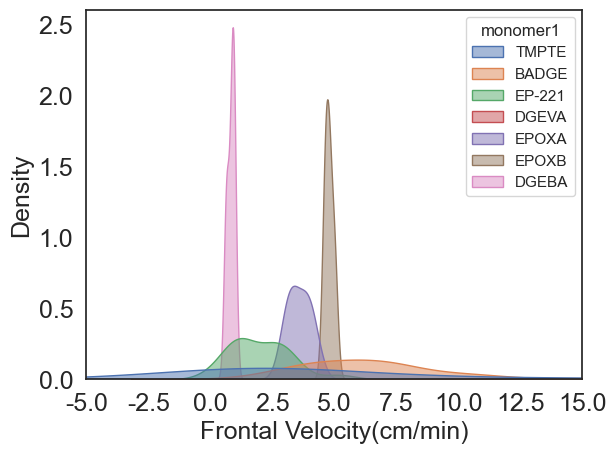

In [69]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_v, x="Frontal Velocity(cm/min)", hue="monomer1", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlim(-5, 15)
plt.savefig("分类速度密度图0320",dpi=600,bbox_inches='tight')
plt.show()

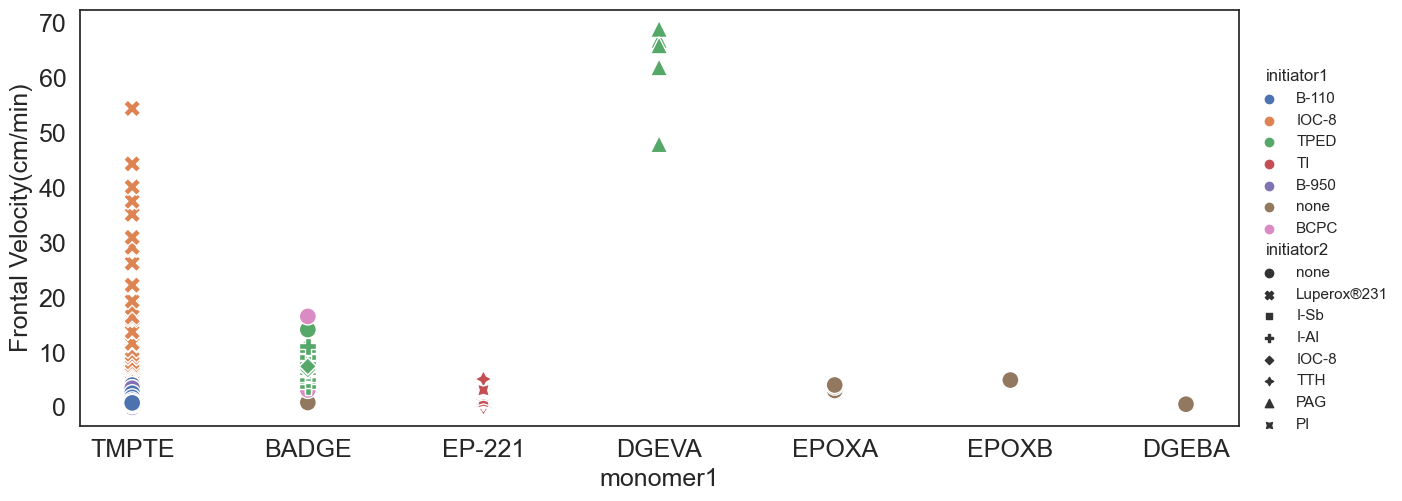

In [101]:
sns.relplot(x='monomer1',y='Frontal Velocity(cm/min)',data = df_v
            , hue = 'initiator1'
            , style = 'initiator2'
            ,aspect = 2.5,s=150)
plt.ylabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.xlabel('monomer1',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("速度分布散点图0320",dpi=600,bbox_inches='tight')

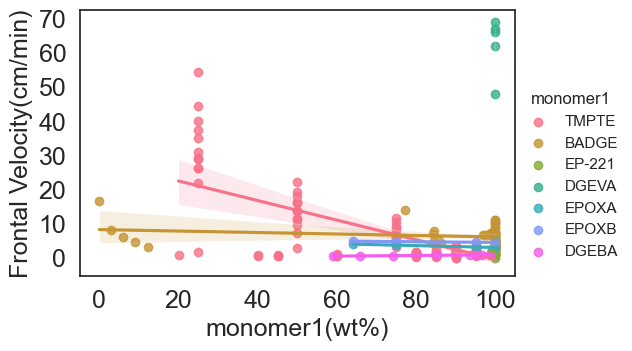

In [71]:
sns.lmplot(data = df_v, x = 'monomer1(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'monomer1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.xlabel('monomer1(wt%)',fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ylim(-2.5, 7)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("速度随单体拟合图0320",dpi=600,bbox_inches='tight')

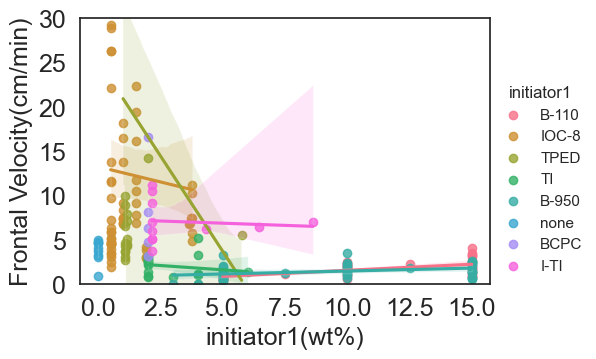

In [81]:
sns.lmplot(data = df_v, x = 'initiator1(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'initiator1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.xlabel('initiator1(wt%)',fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(0, 30)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("速度随引发剂拟合图0320",dpi=600,bbox_inches='tight')

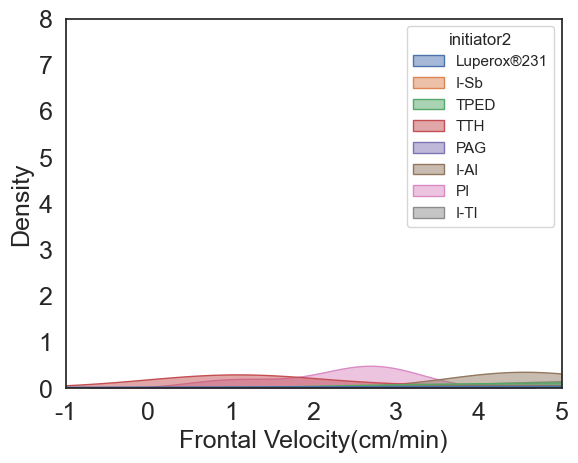

In [21]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_v, x="Frontal Velocity(cm/min)", hue="initiator2", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(0, 8)
plt.xticks(fontsize = 18)
plt.xlim(-1, 5)
plt.savefig("前端速度密度图initiator10320",dpi=600,bbox_inches='tight')
plt.show()

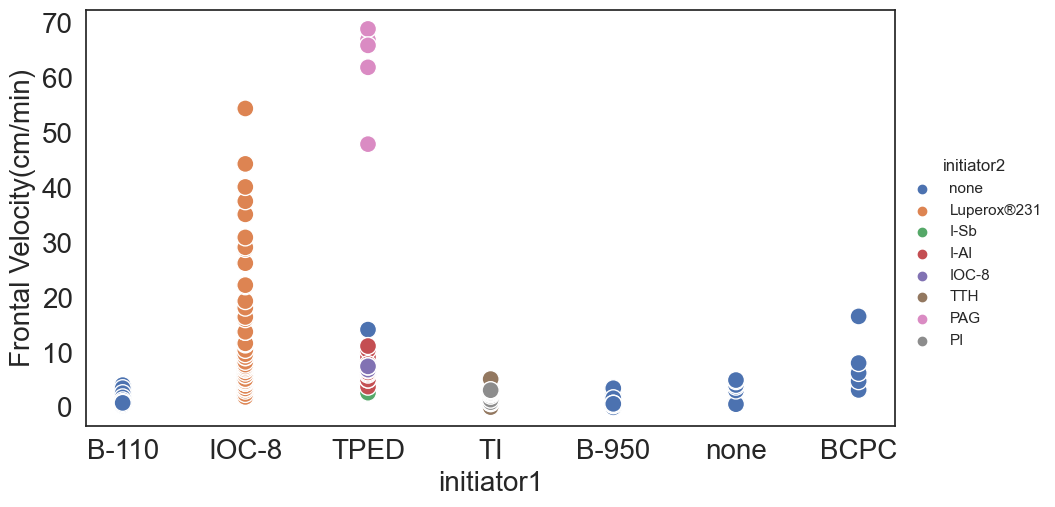

In [102]:
sns.relplot(x='initiator1',y='Frontal Velocity(cm/min)',data = df_v
            , hue = 'initiator2'
            #, style = 'catalyst'
            ,aspect =1.8, s=150)
plt.ylabel("Frontal Velocity(cm/min)", fontsize = 20)
plt.xlabel('initiator1',fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("前端速度分布散点图-引发剂10320",dpi=600,bbox_inches='tight')

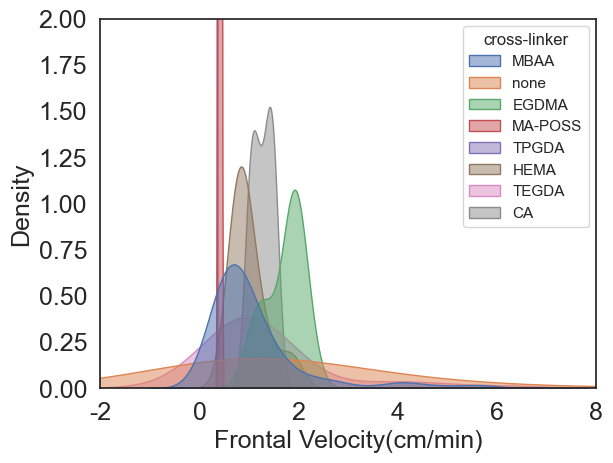

In [20]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_v, x="Frontal Velocity(cm/min)", hue="cross-linker", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(0, 2)
plt.xticks(fontsize = 18)
plt.xlim(-2, 8)
plt.savefig("前端速度密度图cross-linker0318",dpi=600,bbox_inches='tight')
plt.show()

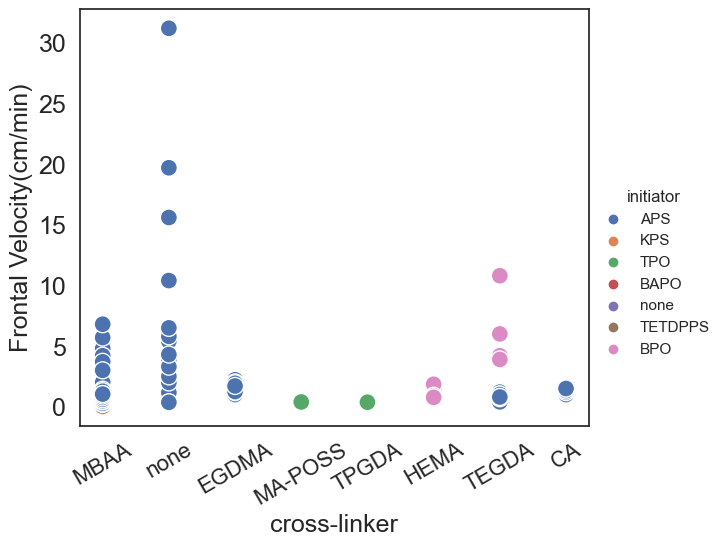

In [28]:
sns.relplot(x='cross-linker',y='Frontal Velocity(cm/min)',data = df_v
            , hue = 'initiator'
            #, style = 'catalyst'
            ,aspect =1.2, s=150)
plt.ylabel("Frontal Velocity(cm/min)", fontsize = 18)
plt.xlabel('cross-linker',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 16, rotation = 30)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("前端速度分布散点图-交联剂0318",dpi=600,bbox_inches='tight')

In [ ]:
#前端温度情况

In [103]:
df_T = new_df.dropna(axis = 'index',how = 'all',subset = ['Frontal Temperature(℃)']) 
#df_T

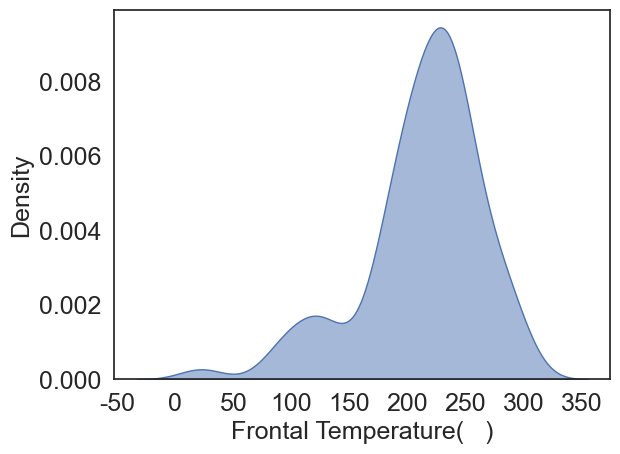

In [84]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_T, x="Frontal Temperature(℃)", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Temperature(   )", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("温度密度图去除0320",dpi=600,bbox_inches='tight')
plt.show()

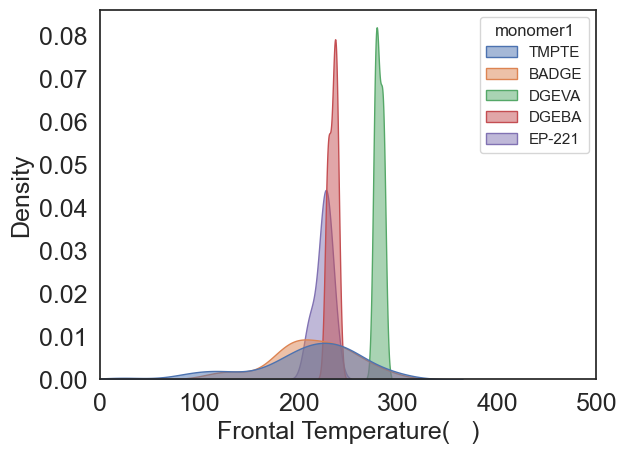

In [104]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_T, x="Frontal Temperature(℃)", hue = 'monomer1', fill=True, common_norm=False, alpha=0.5)
#plt.legend(loc='upper left')
plt.xlabel("Frontal Temperature(   )", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlim(0,500)
plt.savefig("温度密度图去除0320",dpi=600,bbox_inches='tight')
plt.show()

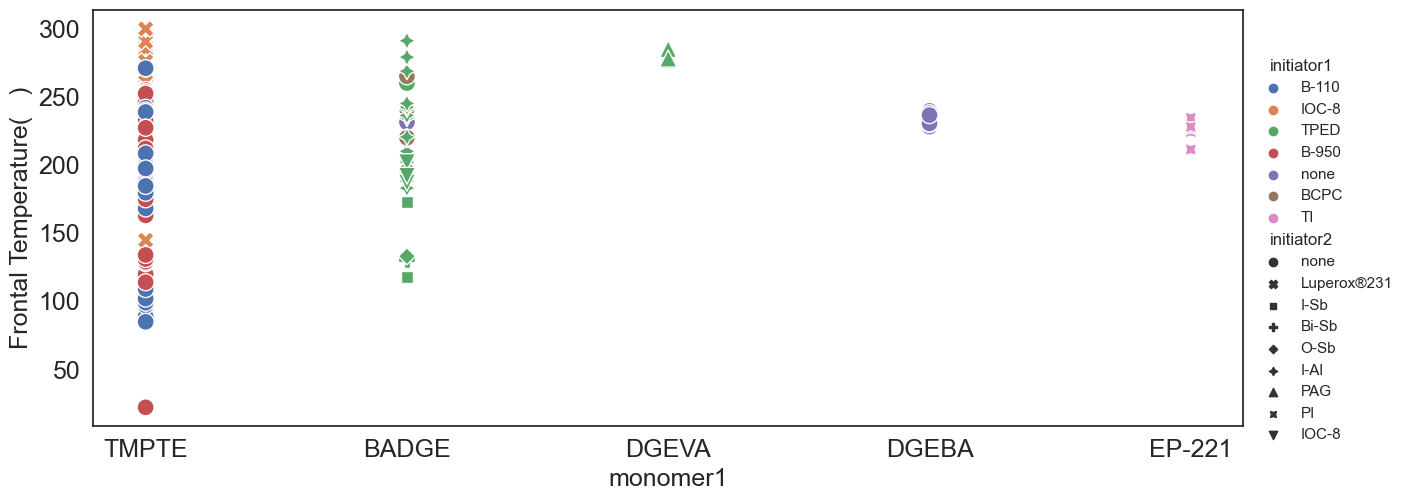

In [105]:
sns.relplot(x='monomer1',y='Frontal Temperature(℃)',data = df_T
            , hue = 'initiator1'
            , style = 'initiator2'
            ,aspect = 2.5,s=150)
plt.ylabel("Frontal Temperature(   )", fontsize = 18)
plt.xlabel('monomer1',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("温度分布散点图0320",dpi=600,bbox_inches='tight')

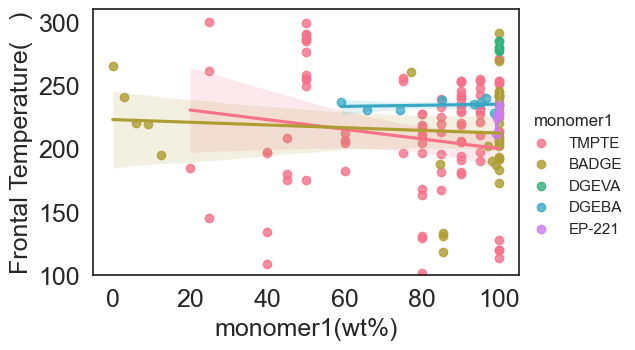

In [106]:
sns.lmplot(data = df_T, x = 'monomer1(wt%)', y = 'Frontal Temperature(℃)'
           , hue = 'monomer1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Temperature(   )", fontsize = 18)
plt.xlabel('monomer1(wt%)',fontsize = 18)
plt.ylim(100, 310)
plt.yticks(range(100, 310, 50),
           fontsize = 18)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("温度随单体拟合图0320",dpi=600,bbox_inches='tight')

In [107]:
df_E = new_df.dropna(axis = 'index',how = 'all',subset = ['glass transition temperature（℃）']) 
df_E

,文献列表,数据排序,名称,杂志名称,年份,classify,monomer1,monomer1(wt%),monomer2,monomer2(wt%),...,不同时间溶胀比（%）,时间\n（h）,不同温度溶胀比（%）,温度\n（C）,3D打印长度\n（mm）,3D打印速度\n（mm/s）,备注1,备注2,引发体系,引发方式
56,7.0,57.0,An Epoxy Adhesive Crosslinked through Radical-...,MACROMOLECULAR,2021.0,epoxy,BADGE,50.00,CE,50.00,...,NaN,NaN,NaN,NaN,NaN,NaN,"1,6-己二醇二丙烯酸酯（HDDA）；过硫酸三己基十四烷基鏻（TETDPPS）",NaN,热引发体系,NaN
57,7.0,58.0,An Epoxy Adhesive Crosslinked through Radical-...,MACROMOLECULAR,2021.0,epoxy,BADGE,40.00,CE,60.00,...,NaN,NaN,NaN,NaN,NaN,NaN,"双酚a二缩水甘油醚（DGEBA）；3,4-环氧环己基甲基3,4-环氧环己烷羧酸酯（CE）；",NaN,热引发体系,NaN
58,7.0,59.0,An Epoxy Adhesive Crosslinked through Radical-...,MACROMOLECULAR,2021.0,epoxy,BADGE,25.00,CE,75.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,NaN
211,17.0,212.0,Radical Induced Cationic Frontal Polymerizatio...,JOURNAL OF POLYMER SCIENCE PART A-POLYMER CHEM...,2016.0,epoxy,BADGE,100.00,none,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,NaN
212,17.0,213.0,Radical Induced Cationic Frontal Polymerizatio...,JOURNAL OF POLYMER SCIENCE PART A-POLYMER CHEM...,2016.0,epoxy,BADGE,100.00,none,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,NaN
268,23.0,269.0,Frontal Cationic Curing of Epoxy Resins in the...,JOURNAL OF APPLIED POLYMER SCIENCE,2014.0,epoxy,TMPTE,100.00,none,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,三羟甲基丙烷三缩水甘油醚（TMPTE）；BF3胺引发剂（Leecure B-110和B-950）,NaN,NaN,NaN
269,23.0,270.0,Frontal Cationic Curing of Epoxy Resins in the...,JOURNAL OF APPLIED POLYMER SCIENCE,2014.0,epoxy,TMPTE,100.00,none,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,23.0,271.0,Frontal Cationic Curing of Epoxy Resins in the...,JOURNAL OF APPLIED POLYMER SCIENCE,2014.0,epoxy,TMPTE,100.00,none,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,23.0,273.0,Frontal Cationic Curing of Epoxy Resins in the...,JOURNAL OF APPLIED POLYMER SCIENCE,2014.0,epoxy,TMPTE,80.00,SiO2,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,23.0,274.0,Frontal Cationic Curing of Epoxy Resins in the...,JOURNAL OF APPLIED POLYMER SCIENCE,2014.0,epoxy,TMPTE,80.00,Kaolin,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


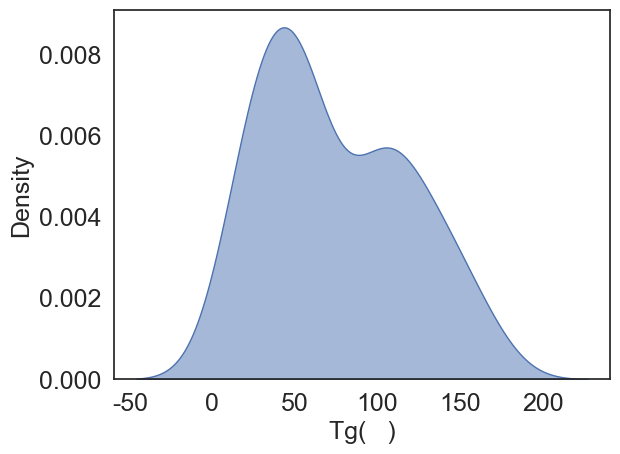

In [108]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_E, x="glass transition temperature（℃）", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Tg(   )", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("Tg密度图去除0320",dpi=600,bbox_inches='tight')
plt.show()

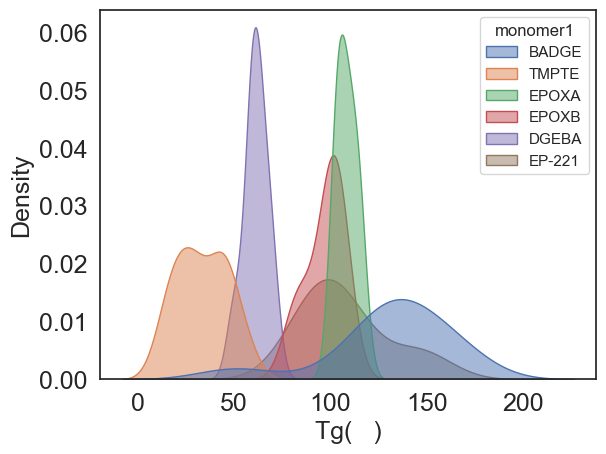

In [109]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_E, x="glass transition temperature（℃）", hue = 'monomer1'
            , fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Tg(   )", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
#plt.ylim(-50000, 100000)
plt.savefig("Tg密度图单体分类0320",dpi=600,bbox_inches='tight')
plt.show()

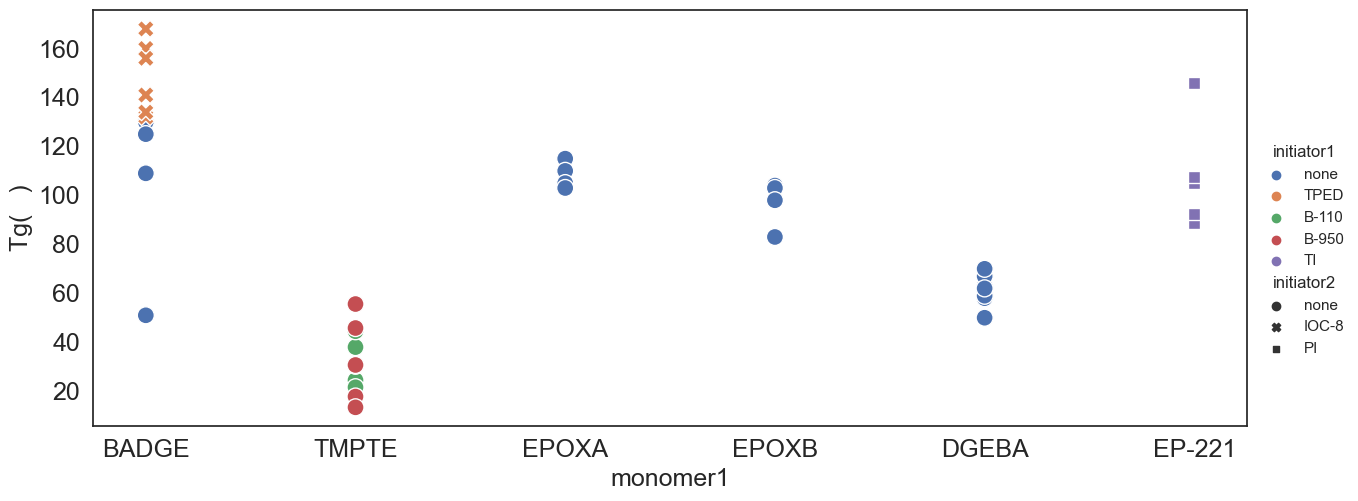

In [110]:
sns.relplot(x='monomer1',y='glass transition temperature（℃）',data = df_E
            , hue = 'initiator1'
            , style = 'initiator2'
            ,aspect = 2.5,s=150)
plt.ylabel("Tg(   )", fontsize = 18)
plt.xlabel('monomer1',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("Tg分布散点图0320",dpi=600,bbox_inches='tight')

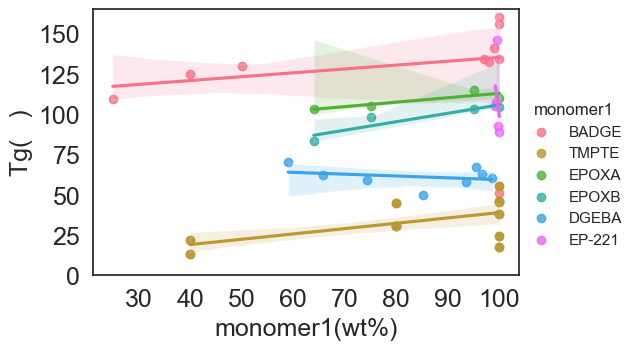

In [113]:
sns.lmplot(data = df_E, x = 'monomer1(wt%)', y = 'glass transition temperature（℃）'
           , hue = 'monomer1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Tg(   )", fontsize = 18)
plt.xlabel('monomer1(wt%)',fontsize = 18)
plt.ylim(0, 165)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("Tg随单体拟合图0320",dpi=600,bbox_inches='tight')

In [114]:
df_EA = new_df.dropna(axis = 'index',how = 'all',subset = ["Young's modulus(MPa)"]) 
#df_T

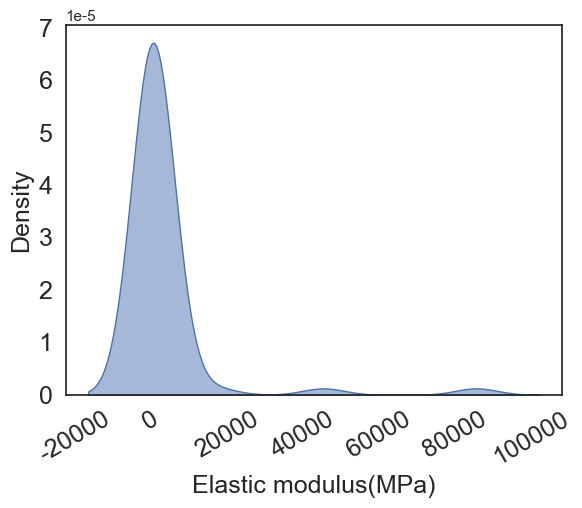

In [118]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_EA, x="Young's modulus(MPa)"
            #, hue = 'Classify'
            , fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Elastic modulus(MPa)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18, rotation = 30)
#plt.ylim(-50000, 100000)
plt.savefig("弹性模量概率密度0320",dpi=600,bbox_inches='tight')
plt.show()

In [139]:
df_3 = df_EA[df_EA['monomer1'] == 'BADGE']

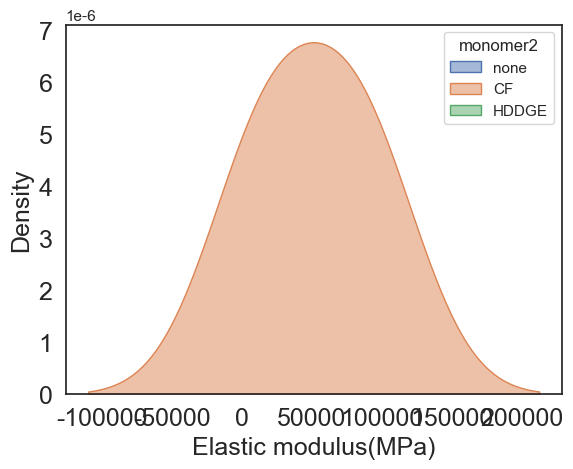

In [141]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_3, x="Young's modulus(MPa)", hue="monomer2", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Elastic modulus(MPa)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ylim(0,0.001)
plt.xticks(fontsize = 18)
#plt.xlim(-20000,100000)
plt.savefig("BADGE弹性模量概率密度单体2分类0320",dpi=600,bbox_inches='tight')
plt.show()

In [131]:
df_2 = df_EA[df_EA['monomer1'] != 'BADGE']

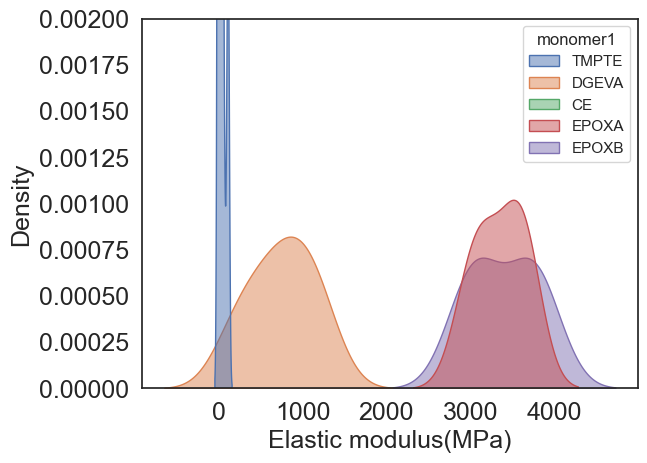

In [140]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_2, x="Young's modulus(MPa)", hue="monomer1", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Elastic modulus(MPa)", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(0,0.002)
plt.xticks(fontsize = 18)
#plt.xlim(-20000,100000)
plt.savefig("弹性模量概率密度单体1分类无BADGE0320",dpi=600,bbox_inches='tight')
plt.show()

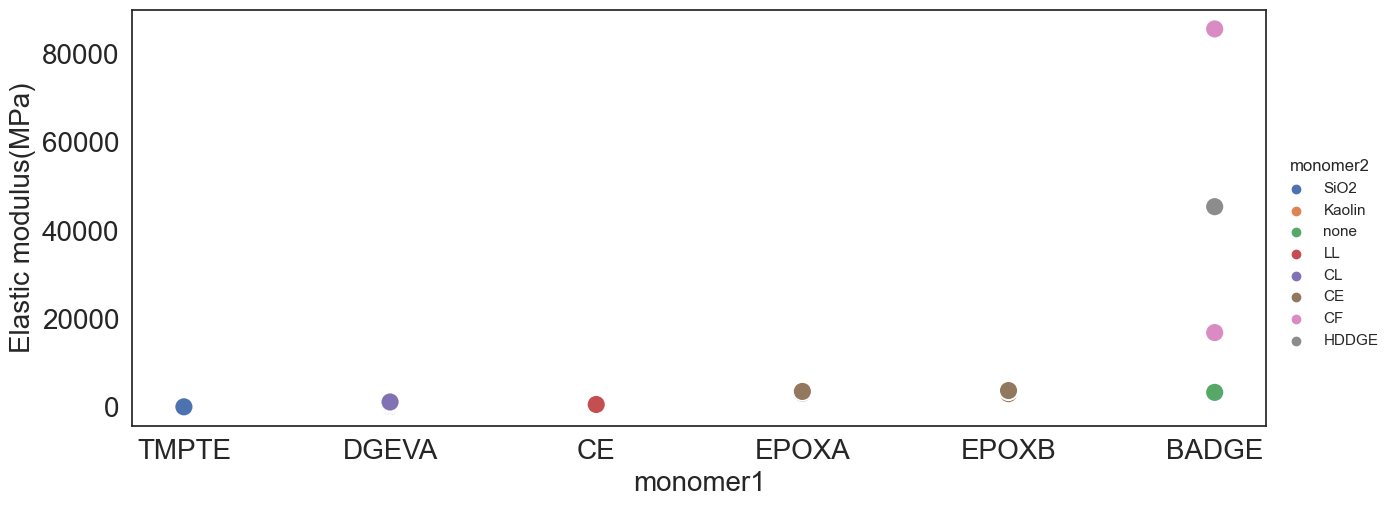

In [150]:
sns.relplot(x='monomer1',y="Young's modulus(MPa)",data = df_EA
            , hue = 'monomer2'
            #, style = 'initiator2'
            ,aspect = 2.5,s=180)
plt.ylabel("Elastic modulus(MPa)", fontsize = 20)
plt.xlabel('monomer1',fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("弹性模量分布散点图0320",dpi=600,bbox_inches='tight')

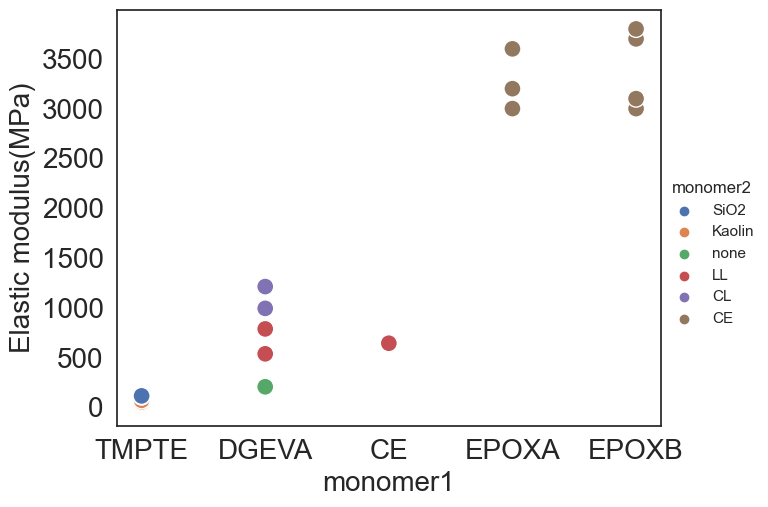

In [151]:
sns.relplot(x='monomer1',y="Young's modulus(MPa)",data = df_2
            , hue = 'monomer2'
            #, style = 'initiator2'
            ,aspect = 1.3,s=150)
plt.ylabel("Elastic modulus(MPa)", fontsize = 20)
plt.xlabel('monomer1',fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("弹性模量分布散点图无BADGE0320",dpi=600,bbox_inches='tight')

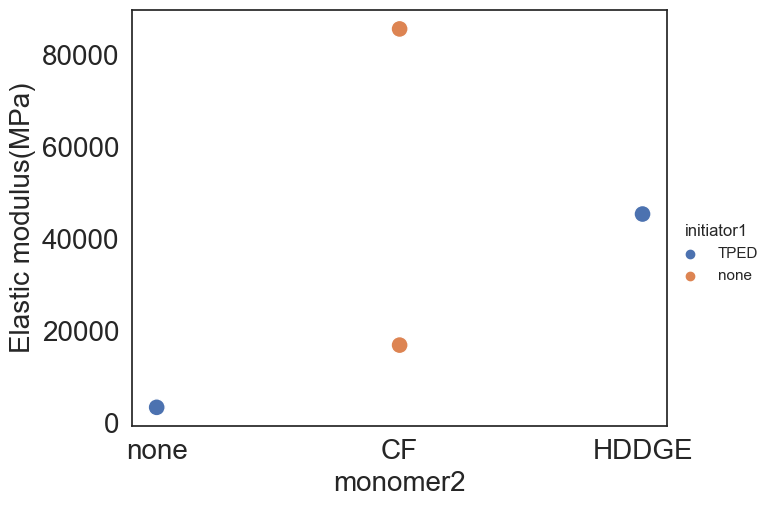

In [152]:
sns.relplot(x='monomer2',y="Young's modulus(MPa)",data = df_3
            , hue = 'initiator1'
            #, style = 'initiator2'
            ,aspect = 1.3,s=150)
plt.ylabel("Elastic modulus(MPa)", fontsize = 20)
plt.xlabel('monomer2',fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("BADGE弹性模量分布散点图单体2_0320",dpi=600,bbox_inches='tight')

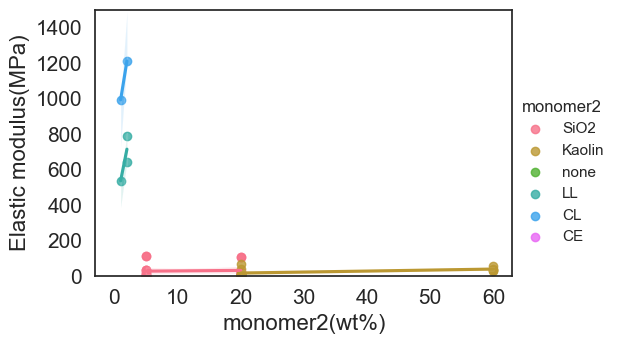

In [154]:
sns.lmplot(data = df_2, x = 'monomer2(wt%)', y = "Young's modulus(MPa)"
           , hue = 'monomer2', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Elastic modulus(MPa)", fontsize = 16)
plt.xlabel('monomer2(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
plt.ylim(0,1500)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("EA随单体2拟合无BADGE",dpi=300,bbox_inches='tight')

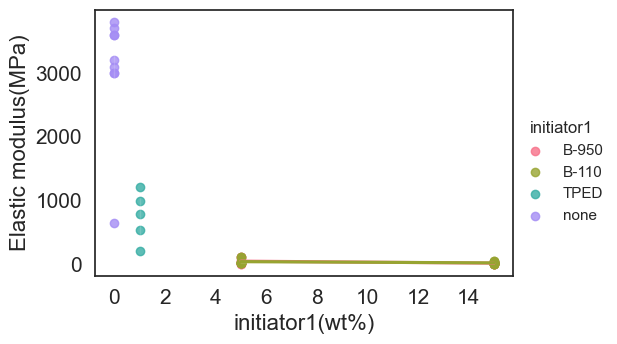

In [156]:
sns.lmplot(data = df_2, x = 'initiator1(wt%)', y = "Young's modulus(MPa)"
           , hue = 'initiator1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Elastic modulus(MPa)", fontsize = 16)
plt.xlabel('initiator1(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
#plt.ylim(0,1500)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("EA随引发剂1拟合",dpi=300,bbox_inches='tight')

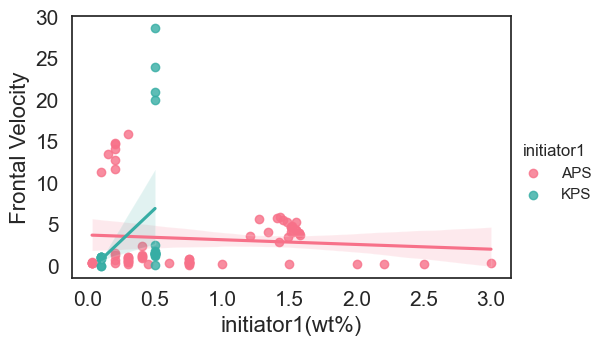

In [25]:
sns.lmplot(data = df_AM, x = 'initiator1(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'initiator1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity", fontsize = 16)
plt.xlabel('initiator1(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("AM速度随initiator拟合",dpi=300,bbox_inches='tight')

In [31]:
df_NIPAAM = df[df['Classify2'] == 'NIPAAM']
df_NIPAAM

,文献列表,数据排序,名称,杂志名称,Time,Classify2,单体1-单体2,单体1+单体2,monomer1,monomer1(wt%),...,随时间增长溶胀比平台值(%),溶胀比随时间增长速率\n%/h,不同温度溶胀比（%）,温度\n（C）,3D打印长度\n（mm）,3D打印速度\n（mm/s）,备注1,备注2,引发体系,引发方式
253,12,254,Construction of triple non-covalent\ninteracti...,JOURNAL OF MATERIALS CHEMISTRY C,2020,NIPAAM,-18.0,90.0,MAH-b-CD,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NIPAM=N-异丙基丙烯酰胺，MAH-b-CD=b-环糊精接枝乙烯基羧酸，ZDA=丙烯酸锌...,NaN,热引发体系,电加热
254,12,255,Construction of triple non-covalent\ninteracti...,JOURNAL OF MATERIALS CHEMISTRY C,2020,NIPAAM,0.0,90.0,MAH-b-CD,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电加热
257,12,258,Construction of triple non-covalent\ninteracti...,JOURNAL OF MATERIALS CHEMISTRY C,2020,NIPAAM,-18.0,90.0,MAH-b-CD,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电加热
258,12,259,Construction of triple non-covalent\ninteracti...,JOURNAL OF MATERIALS CHEMISTRY C,2020,NIPAAM,-18.0,90.0,MAH-b-CD,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电加热
259,12,260,Construction of triple non-covalent\ninteracti...,JOURNAL OF MATERIALS CHEMISTRY C,2020,NIPAAM,-18.0,90.0,MAH-b-CD,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电加热
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,66,2049,Stimuli Responsive Hydrogels Prepared by Front...,BIOMACROMOLECULES,2009,NIPAAM,41.8,100.0,NIPAAm,70.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,NaN
2049,66,2050,Stimuli Responsive Hydrogels Prepared by Front...,BIOMACROMOLECULES,2009,NIPAAM,100.0,100.0,NIPAAm,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,NaN
2059,66,2060,Stimuli Responsive Hydrogels Prepared by Front...,BIOMACROMOLECULES,2009,NIPAAM,41.8,100.0,NIPAAm,70.9,...,NaN,NaN,651.7,20.0,NaN,NaN,NaN,NaN,热引发体系,NaN
2060,66,2061,Stimuli Responsive Hydrogels Prepared by Front...,BIOMACROMOLECULES,2009,NIPAAM,41.8,100.0,NIPAAm,70.9,...,NaN,NaN,585.4,25.0,NaN,NaN,NaN,NaN,热引发体系,NaN


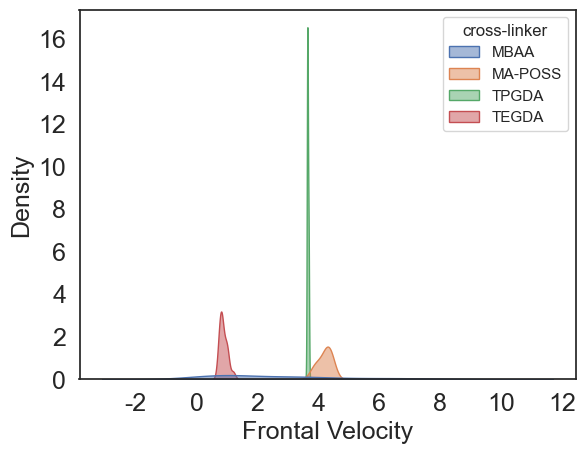

In [32]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_NIPAAM, x="Frontal Velocity(cm/min)", hue="cross-linker", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("NIPAAM速度度密度图cross-linker",dpi=300,bbox_inches='tight')
plt.show()

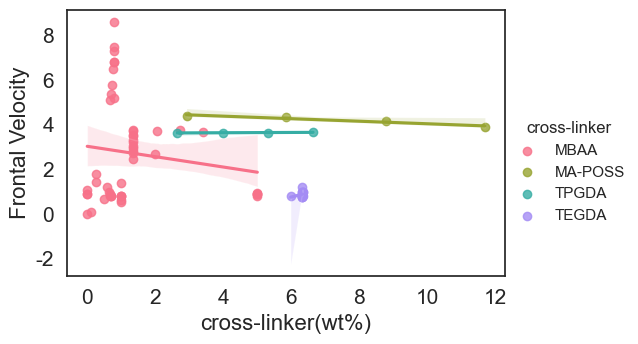

In [33]:
sns.lmplot(data = df_NIPAAM, x = 'cross-linker(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'cross-linker', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity", fontsize = 16)
plt.xlabel('cross-linker(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("NIPAAM速度随cross-linker拟合",dpi=300,bbox_inches='tight')

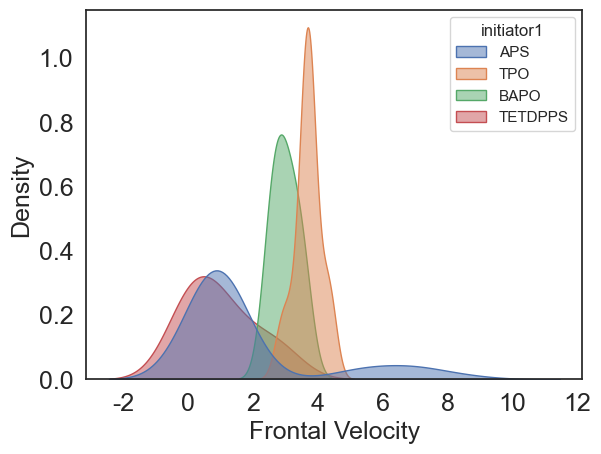

In [34]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_NIPAAM, x="Frontal Velocity(cm/min)", hue="initiator1", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("NIPAAM速度密度图initiator1",dpi=300,bbox_inches='tight')
plt.show()

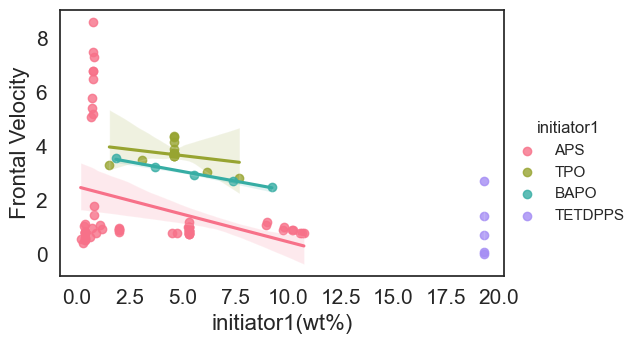

In [35]:
sns.lmplot(data = df_NIPAAM, x = 'initiator1(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'initiator1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity", fontsize = 16)
plt.xlabel('initiator1(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("NIPAAM速度随initiator拟合",dpi=300,bbox_inches='tight')

In [36]:
df_AC = df[df['Classify2'] == 'AC']
df_AC

,文献列表,数据排序,名称,杂志名称,Time,Classify2,单体1-单体2,单体1+单体2,monomer1,monomer1(wt%),...,随时间增长溶胀比平台值(%),溶胀比随时间增长速率\n%/h,不同温度溶胀比（%）,温度\n（C）,3D打印长度\n（mm）,3D打印速度\n（mm/s）,备注1,备注2,引发体系,引发方式
97,6,98,Starch as a reinforcement agent for poly(ionic...,CARBOHYDRATE POLYMERS,2021,AC,47.40,74.00,AAc,60.70,...,NaN,NaN,NaN,NaN,NaN,NaN,丙烯酸（AAc）；丙烯酰胺（AM）；氢键供体（HBD）；氯化胆碱（ChCl）；氢键受体（HBA）；,深共晶,热引发体系,电烙铁加热
98,6,99,Starch as a reinforcement agent for poly(ionic...,CARBOHYDRATE POLYMERS,2021,AC,46.81,73.07,AAc,59.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电烙铁加热
99,6,100,Starch as a reinforcement agent for poly(ionic...,CARBOHYDRATE POLYMERS,2021,AC,46.20,72.20,AAc,59.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电烙铁加热
100,6,101,Starch as a reinforcement agent for poly(ionic...,CARBOHYDRATE POLYMERS,2021,AC,45.10,70.30,AAc,57.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电烙铁加热
101,6,102,Starch as a reinforcement agent for poly(ionic...,CARBOHYDRATE POLYMERS,2021,AC,42.60,66.60,AAc,54.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,热引发体系,电烙铁加热
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,72,2219,Frontal Copolymerization Synthesis and Propert...,CHEMISTRY-A EUROPEAN JOURNAL,2005,AC,-25.80,90.32,acrylic acid,32.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219,72,2220,Frontal Copolymerization Synthesis and Propert...,CHEMISTRY-A EUROPEAN JOURNAL,2005,AC,-25.80,90.32,acrylic acid,32.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2220,72,2221,Frontal Copolymerization Synthesis and Propert...,CHEMISTRY-A EUROPEAN JOURNAL,2005,AC,-25.80,90.32,acrylic acid,32.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2221,72,2222,Frontal Copolymerization Synthesis and Propert...,CHEMISTRY-A EUROPEAN JOURNAL,2005,AC,-25.80,90.32,acrylic acid,32.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


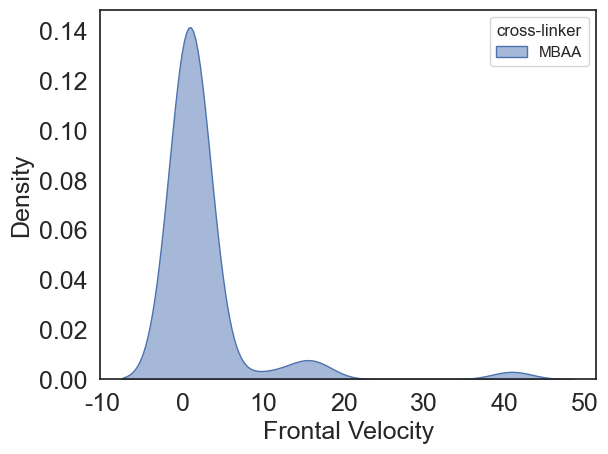

In [37]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_AC, x="Frontal Velocity(cm/min)", hue="cross-linker", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("AC速度度密度图cross-linker",dpi=300,bbox_inches='tight')
plt.show()

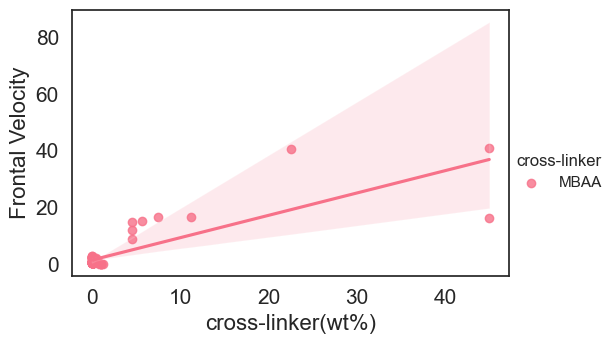

In [38]:
sns.lmplot(data = df_AC, x = 'cross-linker(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'cross-linker', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity", fontsize = 16)
plt.xlabel('cross-linker(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("AC速度随cross-linker拟合",dpi=300,bbox_inches='tight')

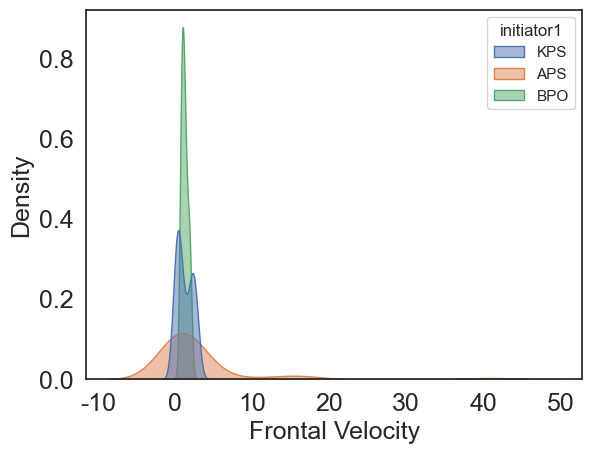

In [39]:
# 使用 kdeplot 绘制概率密度分布图
sns.kdeplot(data=df_AC, x="Frontal Velocity(cm/min)", hue="initiator1", fill=True, common_norm=False, alpha=0.5)
#plt.legend(fontsize='large')
plt.xlabel("Frontal Velocity", fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("AC速度密度图initiator1",dpi=300,bbox_inches='tight')
plt.show()

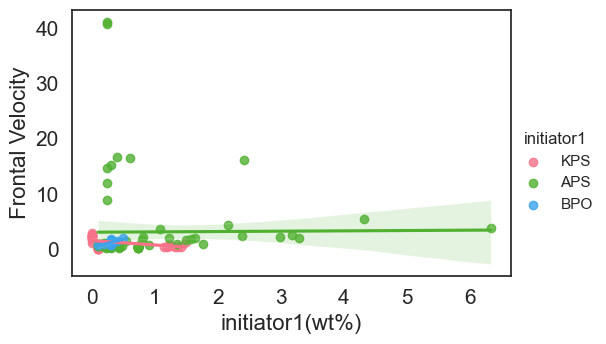

In [40]:
sns.lmplot(data = df_AC, x = 'initiator1(wt%)', y = 'Frontal Velocity(cm/min)'
           , hue = 'initiator1', aspect=1.5, palette='husl', height = 3.5)
plt.ylabel("Frontal Velocity", fontsize = 16)
plt.xlabel('initiator1(wt%)',fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.savefig("AC速度随initiator拟合",dpi=300,bbox_inches='tight')